# Feature Extraction Methods
The main idea taken from the blog: https://towardsdatascience.com/feature-extraction-techniques-d619b56e31be

The advantage of Feature Extraction Methods

    1. Accuracy improvements.
    2. Overfitting risk reduction.
    3. Speed up in training.
    4. Improved Data Visualization.
    5. Increase in explainability of our model.

* Feature Extraction aims to reduce the number of features in a dataset by creating new features from the existing ones (and then discarding the original features).

In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('../../data/mushrooms.csv')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [43]:
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [44]:
X = df.drop(columns=['class'])
y = df['class']

### Since all the features are categorical we will apply one-hot encoder

In [45]:
X = pd.get_dummies(X, prefix='_')

In [46]:
X.shape

(8124, 117)

In [55]:
# 
X = StandardScaler().fit_transform(X)
y = LabelEncoder().fit_transform(y)

In [56]:
X

array([[-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
         4.59086996, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [ 4.11988487, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       ...,
       [-0.24272523, -0.02219484,  1.2559503 , ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197]])

In [57]:
def train_clf(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
    start = time.process_time()
    # n_estimators, number od weak learner
    model = RandomForestClassifier(n_estimators=160).fit(X_train,y_train)
    print(f'Time elapsed : {time.process_time() - start : 2.2f} secs')
    pred = model.predict(X_test)
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))

In [58]:
train_clf(X, y)

Time elapsed :  0.98 secs
[[1257    0]
 [   0 1181]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



### Principle Component Analysis
    1. PCA is one of the most used linear dimensionality reduction technique. 
    2. PCA takes original data and try to find a combination of the input features which can best summarize the original data distribution so that to reduce its original dimensions. 
    3. PCA is able to do this by maximizing variances and minimizing the reconstruction error by looking at pair wised distances. 
    4. In PCA, our original data is projected into a set of orthogonal axes and each of the axes gets ranked in order of importance.
    5. PCA is an unsupervised learning algorithm, therefore it doesn’t care about the data labels but only about variation. This can lead in some cases to misclassification of data.

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([PCA_df, df['class']], axis = 1)
PCA_df['class'] = LabelEncoder().fit_transform(PCA_df['class'])
PCA_df.head()

PC1       PC2  class
0 -3.284664  1.020039      1
1 -3.969459 -0.856935      0
2 -4.958591 -0.211122      0
3 -3.469903  0.337871      1
4 -2.726537  0.889598      0

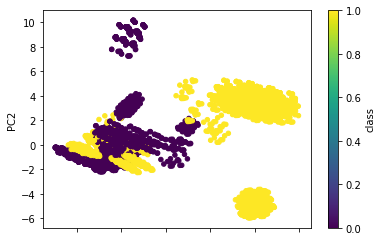

In [60]:
PCA_df.plot.scatter(x='PC1', y='PC2', c='class', colormap='viridis')

In [61]:
train_clf(X_pca, y)

Time elapsed :  1.33 secs
[[1221   36]
 [ 103 1078]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1257
           1       0.97      0.91      0.94      1181

    accuracy                           0.94      2438
   macro avg       0.94      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438



### Independent Component Alaysis (ICA)
ICA is a linear dimensionality reduction method which takes as input data a mixture of independent components and it aims to correctly identify each of them (deleting all the unnecessary noise). Two input features can be considered independent if both their linear and not linear dependance is equal to zero [1].
Independent Component Analysis is commonly used in medical applications such as EEG and fMRI analysis to separate useful signals from unhelpful ones.

As a simple example of an ICA application, let’s consider we are given an audio registration in which there are two different people talking. Using ICA we could, for example, try to identify the two different independent components in the registration (the two different people). In this way, we could make our unsupervised learning algorithm recognise between the different speakers in the conversation.

In [62]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=2)
X_ica = ica.fit_transform(X)

ICA_df = pd.DataFrame(data = X_ica, columns = ['ICA1', 'ICA2'])
ICA_df = pd.concat([ICA_df, df['class']], axis = 1)
ICA_df['class'] = LabelEncoder().fit_transform(ICA_df['class'])

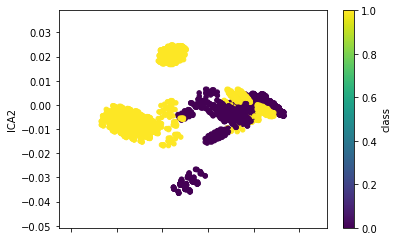

In [63]:
ICA_df.plot.scatter(x='ICA1', y='ICA2', c='class', colormap='viridis')

In [64]:
train_clf(X_ica, y)

Time elapsed :  1.44 secs
[[1225   32]
 [  98 1083]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1257
           1       0.97      0.92      0.94      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



## Linear Discriminant Analysis (LDA)
LDA is supervised learning dimensionality reduction technique and Machine Learning classifier.

LDA aims to maximize the distance between the mean of each class and minimize the spreading within the class itself. LDA uses therefore within classes and between classes as measures. This is a good choice because maximizing the distance between the means of each class when projecting the data in a lower-dimensional space can lead to better classification results (thanks to the reduced overlap between the different classes).

When using LDA, is assumed that the input data follows a Gaussian Distribution (like in this case), therefore applying LDA to not Gaussian data can possibly lead to poor classification results.

In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3)

# Because the data follow the normal distribution, it reduce to 1 feature, altough we said to make it 3 features
# run an LDA and use it to transform the features

X_lda = lda.fit(X, y).transform(X)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

Original number of features: 117
Reduced number of features: 1


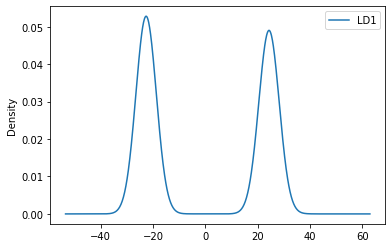

In [82]:
LDA_df = pd.DataFrame(data = X_lda, columns = ['LD1'])
LDA_df.plot(kind='kde')

In [83]:
LDA_df

LD1
0     24.097381
1    -22.864509
2    -22.447502
3     24.536561
4    -22.658988
...         ...
8119 -21.146087
8120 -24.295952
8121 -21.213889
8122  24.596200
8123 -21.210521

[8124 rows x 1 columns]

In [84]:
train_clf(X_lda, y)

Time elapsed :  0.68 secs
[[1257    0]
 [   0 1181]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



## Locally Linear Embedding (LLE)
We have considered so far methods such as PCA and LDA, which are able to perform really well in case of linear relationships between the different features, we will now move on considering how to deal with non-linear cases.

Locally Linear Embedding is a dimensionality reduction technique based on Manifold Learning. A Manifold is an object of D dimensions which is embedded in an higher-dimensional space. Manifold 

Learning aims then to make this object representable in its original D dimensions instead of being represented in an unnecessary greater space.
A typical example used to explain Manifold Learning in Machine Learning is the Swiss Roll Manifold (Figure 6). We are given as input some data which has a distribution resembling the one of a roll (in a 3D space), and we can then unroll it so that to reduce our data into a two-dimensional space.

In [87]:
from sklearn.manifold import LocallyLinearEmbedding

embedding = LocallyLinearEmbedding(n_components=2)
X_lle = embedding.fit_transform(X)


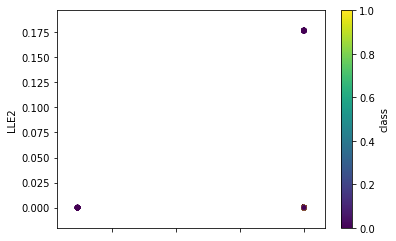

In [88]:
LLE_df = pd.DataFrame(data = X_lle, columns = ['LLE1', 'LLE2'])
LLE_df = pd.concat([LLE_df, df['class']], axis = 1)
LLE_df['class'] = LabelEncoder().fit_transform(LLE_df['class'])

LLE_df.plot.scatter(x='LLE1', y='LLE2', c='class', colormap='viridis')

In [89]:
train_clf(X_lle, y)

Time elapsed :  0.92 secs
[[1257    0]
 [1181    0]]
              precision    recall  f1-score   support

           0       0.52      1.00      0.68      1257
           1       0.00      0.00      0.00      1181

    accuracy                           0.52      2438
   macro avg       0.26      0.50      0.34      2438
weighted avg       0.27      0.52      0.35      2438



## t-distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE is non-linear dimensionality reduction technique which is typically used to visualize high dimensional datasets. Some of the main applications of t-SNE are Natural Language Processing (NLP), speech processing, etc…
t-SNE works by minimizing the divergence between a distribution constituted by the pairwise probability similarities of the input features in the original high dimensional space and its equivalent in the reduced low dimensional space. t-SNE makes then use of the Kullback-Leiber (KL) divergence in order to measure the dissimilarity of the two different distributions. The KL divergence is then minimized using gradient descent.
When using t-SNE, the higher dimensional space is modelled using a Gaussian Distribution, while the lower-dimensional space is modelled using a Student’s t-distribution. This is done, in order to avoid an imbalance in the neighbouring points distance distribution caused by the translation into a lower-dimensional space.


In [98]:
from sklearn.manifold import TSNE

start = time.process_time()
# need to find to how to set p value
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, metric='minkowski')
X_tsne = tsne.fit_transform(X)
print(time.process_time() - start)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8124 samples in 0.267s...
[t-SNE] Computed neighbors for 8124 samples in 22.566s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8124
[t-SNE] Computed conditional probabilities for sample 2000 / 8124
[t-SNE] Computed conditional probabilities for sample 3000 / 8124
[t-SNE] Computed conditional probabilities for sample 4000 / 8124
[t-SNE] Computed conditional probabilities for sample 5000 / 8124
[t-SNE] Computed conditional probabilities for sample 6000 / 8124
[t-SNE] Computed conditional probabilities for sample 7000 / 8124
[t-SNE] Computed conditional probabilities for sample 8000 / 8124
[t-SNE] Computed conditional probabilities for sample 8124 / 8124
[t-SNE] Mean sigma: 0.893529
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.686966
[t-SNE] KL divergence after 300 iterations: 2.159395
90.69152


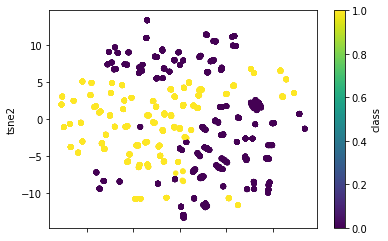

In [99]:
TSNE_df = pd.DataFrame(data = X_tsne, columns = ['tsne1', 'tsne2'])
TSNE_df = pd.concat([TSNE_df, df['class']], axis = 1)
TSNE_df['class'] = LabelEncoder().fit_transform(TSNE_df['class'])

TSNE_df.plot.scatter(x='tsne1', y='tsne2', c='class', colormap='viridis')

In [101]:
tsne.metric

'minkowski'

In [102]:
train_clf(X_tsne, y)

Time elapsed :  1.12 secs
[[1254    3]
 [   0 1181]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



## Autoencoders

Please see the https://towardsdatascience.com/feature-extraction-techniques-d619b56e31be

In [63]:
X.shape

(8124, 117)

In [103]:
from keras.layers import Input, Dense
from keras.models import Model

# Encoder
input_layer = Input(shape=(X.shape[1],))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)

# latency space
encoded = Dense(3, activation='relu')(encoded)

# Decoder
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(X.shape[1], activation='softmax')(decoded)

# Auto Encoder
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Estiamte Latency Space
encoder = Model(input_layer, encoded)

Using TensorFlow backend.


In [104]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 117)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                7552      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 51        
_________________________________________________________________
dense_5 (Dense)              (None, 16)                64        
_________________________________________________________________
dense_6 (Dense)              (None, 32)                544 

In [105]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 117)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                7552      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 51        
Total params: 10,211
Trainable params: 10,211
Non-trainable params: 0
_________________________________________________________________


In [107]:
# Split Dataset
X1, X2, Y1, Y2 = train_test_split(X, X, test_size=0.3, random_state=42)

# Train Auto Encoder
autoencoder.fit(X1, Y1, epochs=100, batch_size=300, shuffle=True, verbose = 1, validation_data=(X2, Y2))


Train on 5686 samples, validate on 2438 samples
Epoch 1/100
5686/5686 [==============================] - 1s 89us/step - loss: -2.2960 - val_loss: -2.2867
Epoch 2/100
5686/5686 [==============================] - 1s 114us/step - loss: -2.3286 - val_loss: -2.3214
Epoch 3/100
5686/5686 [==============================] - 1s 127us/step - loss: -2.3597 - val_loss: -2.3479
Epoch 4/100
5686/5686 [==============================] - 1s 119us/step - loss: -2.3814 - val_loss: -2.3672
Epoch 5/100
5686/5686 [==============================] - 1s 100us/step - loss: -2.3957 - val_loss: -2.3783
Epoch 6/100
5686/5686 [==============================] - 1s 100us/step - loss: -2.4044 - val_loss: -2.3838
Epoch 7/100
5686/5686 [==============================] - 1s 148us/step - loss: -2.4105 - val_loss: -2.3904
Epoch 8/100
5686/5686 [==============================] - 1s 121us/step - loss: -2.4186 - val_loss: -2.3983
Epoch 9/100
5686/5686 [==============================] - 1s 111us/step - loss: -2.4249 - val_loss

In [109]:
X_ae = encoder.predict(X)

In [110]:
X_ae

array([[ 44.032795,  88.44742 , 191.12708 ],
       [ 23.723671,  21.644787,  91.406   ],
       [ 33.266537,  30.878788, 114.1266  ],
       ...,
       [119.87992 , 152.45284 ,  59.28425 ],
       [151.14172 ,  82.713806,  26.80312 ],
       [134.64462 , 169.29869 ,  77.277275]], dtype=float32)

In [111]:
AE_df = pd.DataFrame(data = X_ae, columns = ['ae1', 'ae2', 'ae3'])
AE_df = pd.concat([AE_df, df['class']], axis = 1)
AE_df['class'] = LabelEncoder().fit_transform(AE_df['class'])

#AE_df.plot.scatter(x='ae1', y='ae2', c='class', colormap='viridis')

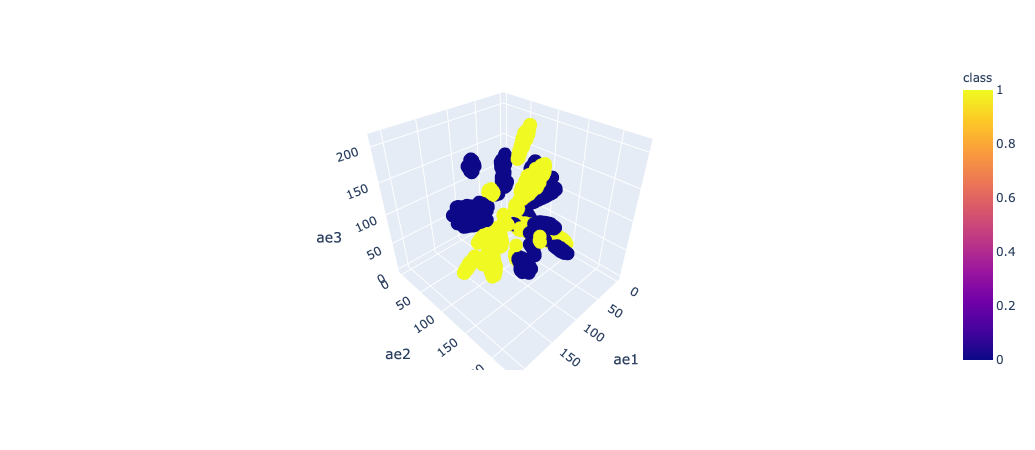

In [112]:
import plotly.express as px
fig = px.scatter_3d(AE_df, x='ae1', y='ae2', z='ae3',
              color='class')
fig.show()

In [113]:
train_clf(X_ae, y)

Time elapsed :  1.06 secs
[[1256    1]
 [   0 1181]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

